In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Importing Dataset

In [3]:
poc_data=pd.read_excel("POCM_HISTORICAL.xlsx")

In [4]:
poc_data.head()

,Checkout_Date,Order_Nbr,Item_Nbr,Zip_Code,WSLR_Nbr,Ship_Date,Brand,Partition,Item_Description,Category,...,Weekly_Avg_Qty_Sold,On_Hand_Inventory,On_Order_Inventory,Pending_WO_Inventory,Remaining_Inventory_Weeks,Order_Quantity,LastModId,LastModMachine,LastModApp,LastModTsp
0,2018-12-04,100003,5000268,63118,0,2018-12-05,Bud Light - Core,Core,Bud Light Satin Flag,POCM,...,NaN,112,0.0,0,22.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
1,2018-12-04,100012,1093107,10011,0,2018-12-07,Bud Light - Core,Core,Base Stacker,POCM,...,NaN,0,0.0,0,52.0,1,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
2,2018-12-05,100030,1090635,20772,0,2018-12-13,Michelob ULTRA - Core +,Core +,NEON - MICHELOB ULTRA,POCM,...,NaN,0,0.0,0,52.0,5,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
3,2018-12-05,100030,5003134,20772,0,2018-12-13,Stella Artois - Super Premium - Import,Import,LED Neon Sign,POCM,...,NaN,0,0.0,0,52.0,10,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10
4,2018-12-05,100030,5007384,20772,0,2018-12-13,Michelob ULTRA - Core +,Core +,Umbrella,POCM,...,NaN,0,0.0,0,52.0,20,ABC\Z926679,NAZUSD5S21H13,Microsoft SQL Server Management Studio - Query,2020-04-28 14:55:10


In [5]:
df = poc_data[["Checkout_Date", "Order_Quantity"]]

# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160577 entries, 0 to 160576
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Checkout_Date   160577 non-null  datetime64[ns]
 1   Order_Quantity  160577 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 MB


In [7]:
df.head()

,Checkout_Date,Order_Quantity
0,2018-12-04,1
1,2018-12-04,1
2,2018-12-05,5
3,2018-12-05,10
4,2018-12-05,20


<Axes: >

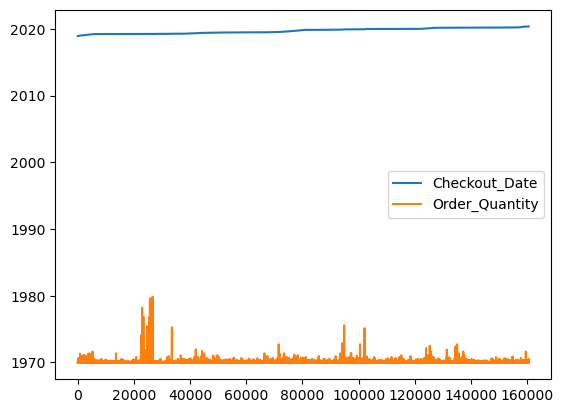

In [8]:
df.plot()

In [9]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-12-04,1
1,2018-12-04,1
2,2018-12-05,5
3,2018-12-05,10
4,2018-12-05,20


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

C:\Users\Tarun\AppData\Local\Temp\ipykernel_2880\3173280147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [11]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

# Model Building

In [12]:
# Initializing Prophet Model
model = Prophet()

In [13]:
model.fit(df)

17:56:07 - cmdstanpy - INFO - Chain [1] start processing
17:56:30 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
df.tail()

,ds,y
160572,2020-05-15,5
160573,2020-05-15,20
160574,2020-05-15,2
160575,2020-05-15,3
160576,2020-05-15,2


In [16]:
# forecasting for future one year
future_dates = model.make_future_dataframe(periods=365)

In [17]:
future_dates.tail()

,ds
830,2021-05-11
831,2021-05-12
832,2021-05-13
833,2021-05-14
834,2021-05-15


In [19]:
# Predicting
forecast = model.predict(future_dates)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-04,18.023616,-27.705528,61.888117,18.023616,18.023616,-0.665417,-0.665417,-0.665417,-0.665417,-0.665417,-0.665417,0.0,0.0,0.0,17.358199
1,2018-12-05,17.974167,-22.820688,65.630731,17.974167,17.974167,4.043039,4.043039,4.043039,4.043039,4.043039,4.043039,0.0,0.0,0.0,22.017206
2,2018-12-06,17.924719,-27.977021,61.424994,17.924719,17.924719,0.839974,0.839974,0.839974,0.839974,0.839974,0.839974,0.0,0.0,0.0,18.764692
3,2018-12-07,17.875270,-25.834630,63.377930,17.875270,17.875270,0.587009,0.587009,0.587009,0.587009,0.587009,0.587009,0.0,0.0,0.0,18.462280
4,2018-12-08,17.825822,-30.860724,60.486832,17.825822,17.825822,-2.751576,-2.751576,-2.751576,-2.751576,-2.751576,-2.751576,0.0,0.0,0.0,15.074246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2021-05-11,5.034510,-85.633681,97.987863,-75.371539,86.409156,-0.665417,-0.665417,-0.665417,-0.665417,-0.665417,-0.665417,0.0,0.0,0.0,4.369093
831,2021-05-12,5.026111,-82.939746,103.082376,-75.500901,86.729994,4.043039,4.043039,4.043039,4.043039,4.043039,4.043039,0.0,0.0,0.0,9.069150
832,2021-05-13,5.017712,-86.299403,101.819262,-75.630262,87.301682,0.839974,0.839974,0.839974,0.839974,0.839974,0.839974,0.0,0.0,0.0,5.857685
833,2021-05-14,5.009313,-87.199954,102.222860,-76.284120,87.609244,0.587009,0.587009,0.587009,0.587009,0.587009,0.587009,0.0,0.0,0.0,5.596322


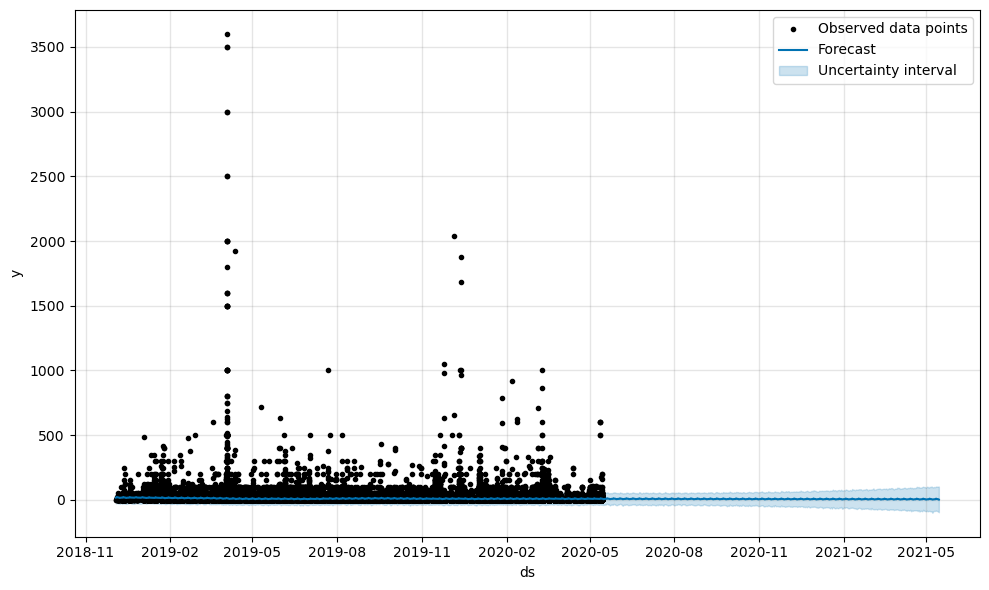

In [22]:
#Ploting Forecast
model.plot(forecast)
plt.legend()
plt.show()

C:\Users\Tarun\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


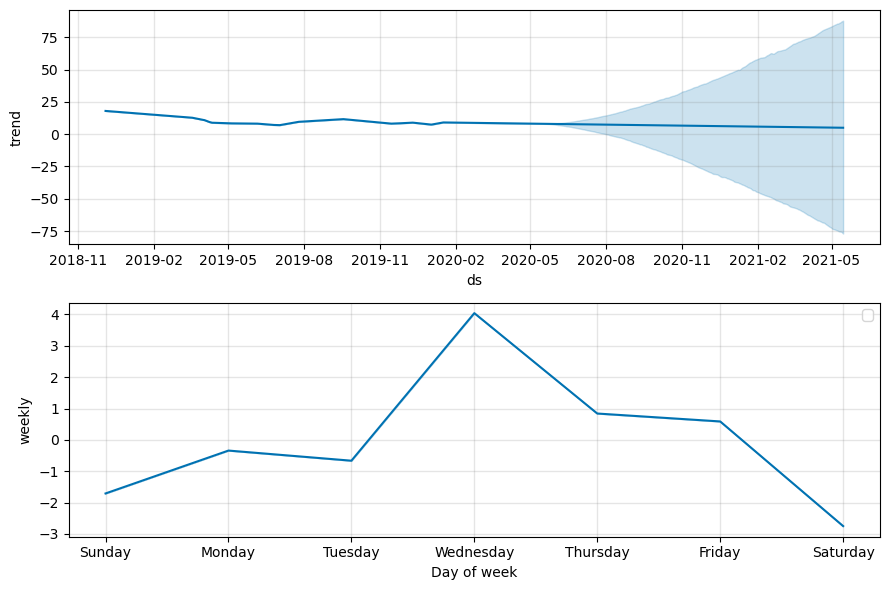

In [23]:
# Ploting components forecast
model.plot_components(forecast)
plt.legend()
plt.show()
